In [21]:
# QUESTION_1
# DDMM = 01/07
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()

In [2]:
# QUESTION_2
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(diabetes['data'], diabetes['target'], random_state = 107)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [23]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
# QUESTION_3
import numpy as np
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, Y_train)
print("Training Score :", lasso.score(X_train, Y_train))
print("-----")
print("Test Score :", lasso.score(X_test, Y_test))
print("-----")
print(diabetes['feature_names'])
print(lasso.coef_ != 0)

Training Score : 0.3246325550816349
-----
Test Score : 0.37399157733154254
-----
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[False False  True  True False False False False  True False]


* Number of Features used = 3
* Features = bmi, bp, s5

In [4]:
# QUESTION_4
X = np.genfromtxt("diabetes.data.txt", skip_header = 1, usecols = np.arange(10))
Y = np.genfromtxt("diabetes.data.txt", skip_header = 1, usecols = 10)
print("X :",X.shape,"Y :", Y.shape)

X : (442, 10) Y : (442,)


In [5]:
# QUESTION_5
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, random_state = 107)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [6]:
# QUESTION_6
lasso1 = Lasso().fit(X_train1, Y_train1)
print("Training Score :", lasso1.score(X_train1, Y_train1))
print("-----")
print("Test Score :", lasso1.score(X_test1, Y_test1))
print("-----")
print(diabetes['feature_names'])
print(lasso1.coef_ != 0)

Training Score : 0.4938822588514533
-----
Test Score : 0.5394373756042796
-----
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[ True  True  True  True  True  True  True  True  True  True]


* Number of features increased from 3 to 10
* Meaning all the features are being used.
* Training and Testing score both increased.

In [7]:
# QUESTION_7
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1)
X_train_scaled = scaler.transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(331, 10)
(111, 10)


In [8]:
# QUESTION_8
lasso_scaled = Lasso().fit(X_train_scaled, Y_train1)
print("Training Score :", lasso_scaled.score(X_train_scaled, Y_train1))
print("-----")
print("Test Score :", lasso_scaled.score(X_test_scaled, Y_test1))
print("-----")
print(diabetes['feature_names'])
print(lasso_scaled.coef_ != 0)

Training Score : 0.4980763282409
-----
Test Score : 0.5499317205392027
-----
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[ True  True  True  True  True False  True  True  True  True]


* Number of Features used decreased from 10 to 9
* But both Training and Testing Score increased slightly.

[ 9.  9.  9.  9. 10. 10. 10. 10.]
[0.54993172 0.54978318 0.54948634 0.54928199 0.54993506 0.5523229
 0.55268176 0.55281055]


Text(0, 0.5, 'Test R^2')

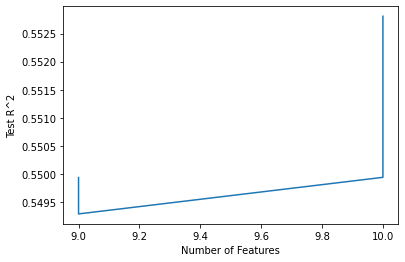

In [9]:
# QUESTION_9
import matplotlib.pyplot as plt
alpha = [1, 0.8, 0.6, 0.5, 0.1, 0.02, 0.006, 0.0008]
lasso_test = np.zeros(len(alpha))
count = np.zeros(len(alpha))
for i in range(len(alpha)):
    lasso_train = Lasso(alpha = alpha[i], max_iter = 100000).fit(X_train_scaled, Y_train1)
    lasso_test[i] = lasso_train.score(X_test_scaled, Y_test1)
    count[i] = np.sum(lasso_train.coef_ != 0)
    
print(count)
print(lasso_test)
plt.plot(count,lasso_test)
plt.xlabel("Number of Features")
plt.ylabel("Test R^2")

* When the parameter value reach 10, it becomes stable(i:e vertical lines)

In [10]:
# QUESTION_10
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
best_score = 0

alpha = [1, 0.8, 0.6, 0.5, 0.1, 0.02, 0.006, 0.0008]
max_iter1 = [1000, 10000, 100000,1000000]

for i in range(len(alpha)) :
    for j in range(len(max_iter1)) :
        cross_value = Lasso(alpha=alpha[i], max_iter=max_iter1[j]).fit(X_train_scaled, Y_train1)
        #Cross-validation
        scores = cross_val_score(cross_value, X_train_scaled, Y_train1, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_alpha = alpha[i]
            best_max_iter = max_iter1[j]
        
lasso_regularized = Lasso(alpha = best_alpha, max_iter = best_max_iter).fit(X_train_scaled, Y_train1)

print("Training Score with best parameters :", lasso_regularized.score(X_train_scaled, Y_train1))
print("-----")
print("Test Score with best parameters :", lasso_regularized.score(X_test_scaled, Y_test1))
print("-----")
print(diabetes['feature_names'])
print(lasso_scaled.coef_ != 0)
print("-----")
print("best alpha :", best_alpha, "best max_iter :", best_max_iter)
print("Best Score :", best_score)

Training Score with best parameters : 0.49972338040647546
-----
Test Score with best parameters : 0.5494863354274007
-----
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[ True  True  True  True  True False  True  True  True  True]
-----
best alpha : 0.6 best max_iter : 1000
Best Score : 0.46432544564353223


* Number of features used here are 9.

### QUESTION_11

In [11]:
X_train_proper, X_calibration, Y_train_proper, Y_calibration = train_test_split(X_train1, Y_train1, test_size = 99, random_state = 107)
print(X_train_proper.shape)
print(X_calibration.shape)

(232, 10)
(99, 10)


In [12]:
scaler = StandardScaler()
scaler.fit(X_train_proper)

StandardScaler()

In [13]:
X_train_proper_scaled = scaler.transform(X_train_proper)
X_calibration_scaled = scaler.transform(X_calibration)
X_test_proper_scaled = scaler.transform(X_test1)

In [14]:
lasso_train1 = Lasso(best_alpha, best_max_iter).fit(X_train_proper_scaled, Y_train_proper)
lasso_calibration = lasso_train1.fit(X_calibration_scaled, Y_calibration)

In [15]:
y_bar = lasso_calibration.predict(X_calibration_scaled)
alpha_calibration = abs(Y_calibration - y_bar)
y_bar = np.sort(alpha_calibration)
print(alpha_calibration.size)

99


### QUESTION_12

In [16]:
# 12_a
print("The training and test R2 for the Lasso model with default parameters on the scikit-learn version of diabetes -")
print("Training Score :", lasso.score(X_train, Y_train))
print("-----")
print("Test Score :", lasso.score(X_test, Y_test))
print("-----")

The training and test R2 for the Lasso model with default parameters on the scikit-learn version of diabetes -
Training Score : 0.3246325550816349
-----
Test Score : 0.37399157733154254
-----


* Number of Features used 3.

In [17]:
# 12_b
print("The training and test R2 for the Lasso model with default parameters on the original version of diabetes -")
print("Training Score :", lasso1.score(X_train1, Y_train1))
print("-----")
print("Test Score :", lasso1.score(X_test1, Y_test1))
print("-----")

The training and test R2 for the Lasso model with default parameters on the original version of diabetes -
Training Score : 0.4938822588514533
-----
Test Score : 0.5394373756042796
-----


* Number of Features used 10.

In [18]:
# 12_c
print("The training and test R2 for the Lasso model with default parameters on normalized version of diabetes -")
print("Training Score :", lasso_scaled.score(X_train_scaled, Y_train1))
print("-----")
print("Test Score :", lasso_scaled.score(X_test_scaled, Y_test1))
print("-----")

The training and test R2 for the Lasso model with default parameters on normalized version of diabetes -
Training Score : 0.4980763282409
-----
Test Score : 0.5499317205392027
-----


* Number of Features used 9.

In [19]:
# 12_d
print("The training and test R2 for the Lasso model with the best parameters chosen by cross-validation on normalized version of diabetes -")
print("Training Score with best parameters :", lasso_regularized.score(X_train_scaled, Y_train1))
print("-----")
print("Test Score with best parameters :", lasso_regularized.score(X_test_scaled, Y_test1))
print("-----")

The training and test R2 for the Lasso model with the best parameters chosen by cross-validation on normalized version of diabetes -
Training Score with best parameters : 0.49972338040647546
-----
Test Score with best parameters : 0.5494863354274007
-----


* Number of Features used 9.